In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('DrDoS_LDAP_new.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_24192\3717026788.py:1: DtypeWarning: Columns (80) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('DrDoS_LDAP_new.csv')


In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1[' Label']= label_encoder.fit_transform(df1[' Label'])
df1[' Label'].unique()

array([1, 0])

In [4]:
df1.drop('SimillarHTTP', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Fwd Packet Length Min', axis=1, inplace=True)
df1.drop('Bwd Packet Length Max', axis=1, inplace=True)
df1.drop(' Bwd Packet Length Min', axis=1, inplace=True)
df1.drop(' Flow IAT Max', axis=1, inplace=True)
df1.drop(' Flow IAT Min', axis=1, inplace=True)
df1.drop(' Fwd IAT Max', axis=1, inplace=True)
df1.drop(' Fwd IAT Min', axis=1, inplace=True)
df1.drop(' Bwd IAT Max', axis=1, inplace=True)
df1.drop(' Bwd IAT Min', axis=1, inplace=True)
df1.drop(' Idle Max', axis=1, inplace=True)
df1.drop(' Idle Min', axis=1, inplace=True)
df1.drop(' Active Max', axis=1, inplace=True)
df1.drop(' Active Min', axis=1, inplace=True)

In [5]:
l = []
for col in df1:
    try:
        if sum(df1[col]) == 0:
            l.append(col)
    except:
        print(col)

In [6]:
df1.drop(l, axis=1, inplace=True)

In [7]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

In [8]:
from sklearn.utils import resample


majority_class = df1[df1[' Label'] == 1]
minority_class = df1[df1[' Label'] == 0]


minority_upsampled = resample(minority_class, replace=True, n_samples=50000, random_state=42)


majority_downsampled = resample(majority_class, replace=False, n_samples=50000, random_state=42)


balanced_df = pd.concat([minority_upsampled, majority_downsampled])


balanced_df = balanced_df.sample(frac=1, random_state=42)

In [9]:
copy_df = balanced_df.copy()

In [10]:
no = balanced_df[balanced_df[' Label'] == 0]
yes = balanced_df[balanced_df[' Label'] == 1]
print(len(no), len(yes))

50000 50000


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# scaler = StandardScaler()
# scaler.fit(X)
# standardized_data = scaler.transform(X)
# X = standardized_data

In [13]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(35)  #value changes hear
print(top_features)

                        Feature  Importance
27            Min Packet Length    0.174371
29           Packet Length Mean    0.129051
8        Fwd Packet Length Mean    0.107199
60              Destination IP4    0.082179
38          Average Packet Size    0.075119
39         Avg Fwd Segment Size    0.063889
55                   Source IP3    0.051721
54                   Source IP2    0.048684
12                 Flow Bytes/s    0.044524
28            Max Packet Length    0.031631
56                   Source IP4    0.023152
1              Destination Port    0.022574
43            Subflow Fwd Bytes    0.021540
25                Fwd Packets/s    0.018272
15                 Flow IAT Std    0.014200
57              Destination IP1    0.013811
3                 Flow Duration    0.012158
6   Total Length of Fwd Packets    0.009500
53                   Source IP1    0.008154
52                      Inbound    0.008040
13               Flow Packets/s    0.005985
44          Subflow Bwd Packets 

In [15]:
x = list(top_features['Feature'])
x.append(' Label')
# x

In [16]:
for i in balanced_df.columns:
    if i not in x:
        balanced_df.drop(i, axis=1, inplace=True)

In [17]:
balanced_df.head()

,Destination Port,Protocol,Flow Duration,Total Backward Packets,Total Length of Fwd Packets,Fwd Packet Length Mean,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,...,Init_Win_bytes_forward,act_data_pkt_fwd,Inbound,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP4
1828060,11765,17,1,0,2944.0,1472.0,0.0,0.0,2.944000e+09,2.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1440274,41507,17,2,0,2944.0,1472.0,0.0,0.0,1.472000e+09,1.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1744063,53,17,54280,2,76.0,38.0,94.0,0.0,4.863670e+03,7.369197e+01,...,-1,1,0,0,192,168,50,7,8,8
826984,49646,17,1,0,2928.0,1464.0,0.0,0.0,2.928000e+09,2.000000e+06,...,-1,1,1,1,172,16,0,5,192,1
1519380,42639,17,2,0,2944.0,1472.0,0.0,0.0,1.472000e+09,1.000000e+06,...,-1,1,1,1,172,16,0,5,192,1


In [18]:
X = balanced_df.drop(columns = ' Label', axis=1)
y = balanced_df[' Label']

In [19]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [20]:
print(len(X), len(standardized_data))

100000 100000


In [21]:
dfX = pd.DataFrame(standardized_data, columns=X.columns)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




X_train, X_test, y_train, y_test = train_test_split(dfX, y, test_size=0.3, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


In [23]:
import shap
shap.initjs()

In [24]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Waterfall Plot:

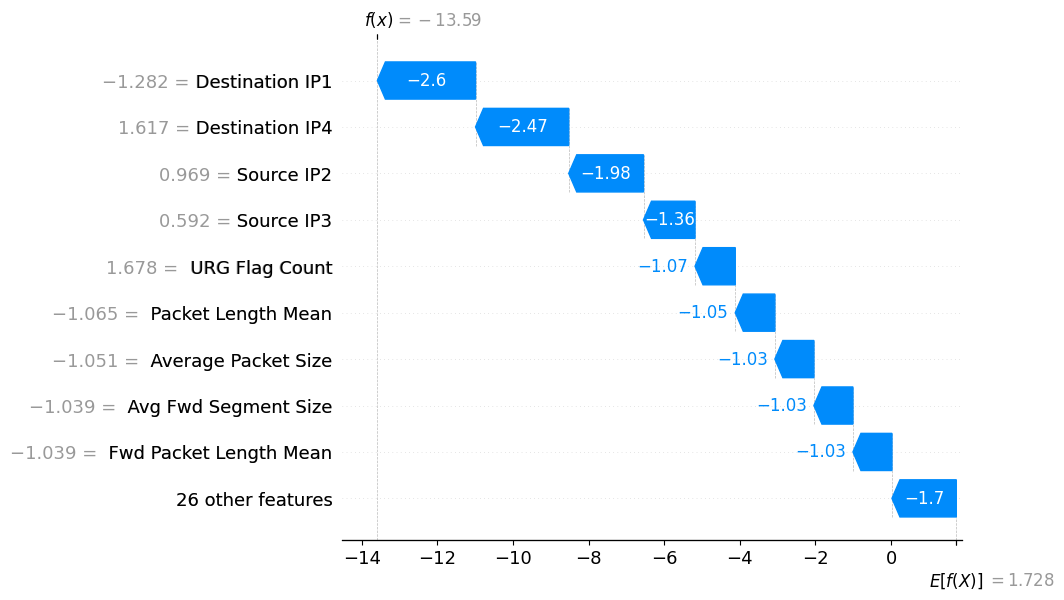

 Destination Port             -0.865878
 Protocol                     -1.172147
 Flow Duration                -0.187854
 Total Backward Packets       -0.234853
Total Length of Fwd Packets   -0.860898
 Fwd Packet Length Mean       -1.039041
 Bwd Packet Length Mean       -0.260095
 Bwd Packet Length Std        -0.192109
Flow Bytes/s                  -0.864481
 Flow Packets/s                1.176989
 Flow IAT Std                 -0.163352
Bwd IAT Total                 -0.117330
 Bwd IAT Mean                 -0.091732
 Bwd IAT Std                  -0.100988
Fwd Packets/s                  1.177684
 Min Packet Length            -1.014489
 Max Packet Length            -1.077311
 Packet Length Mean           -1.065097
 Packet Length Std            -0.238941
 Packet Length Variance       -0.165126
 URG Flag Count                1.677723
 Average Packet Size          -1.050776
 Avg Fwd Segment Size         -1.039041
Subflow Fwd Packets           -0.007025
 Subflow Fwd Bytes            -0.860898


0

In [25]:
shap.plots.waterfall(shap_values[0])
print(X_test.iloc[0])
list(y_test)[0]

# Force Plot:

In [26]:
shap.plots.force(shap_values[0])

# Mean SHAP Plot:

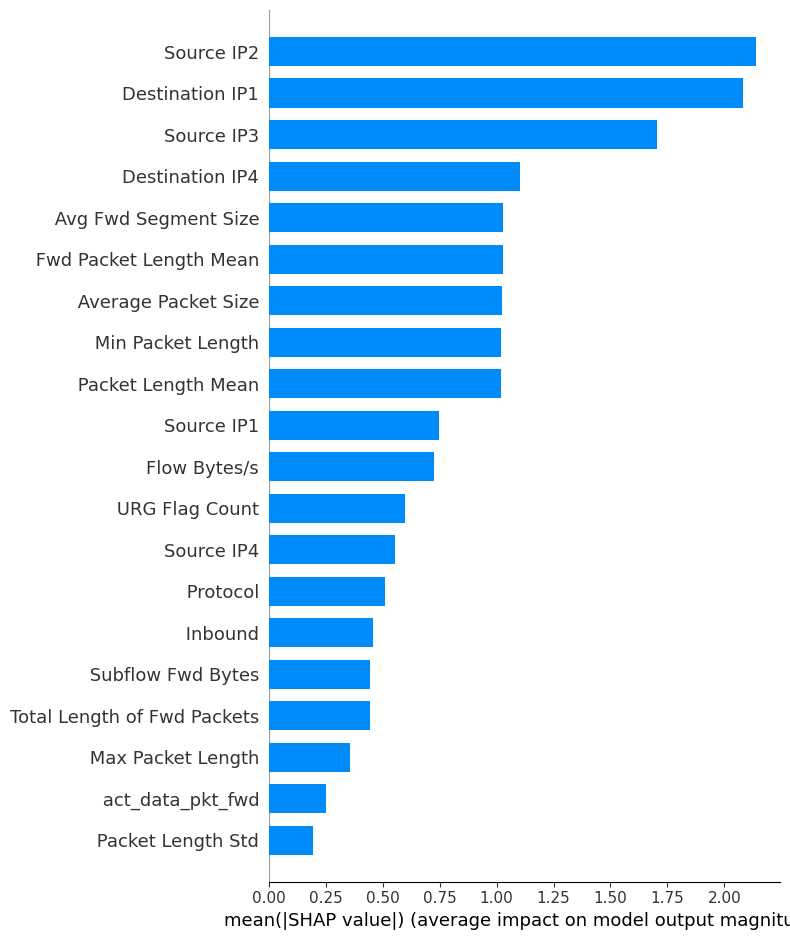

In [27]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Beeswarm Plot:

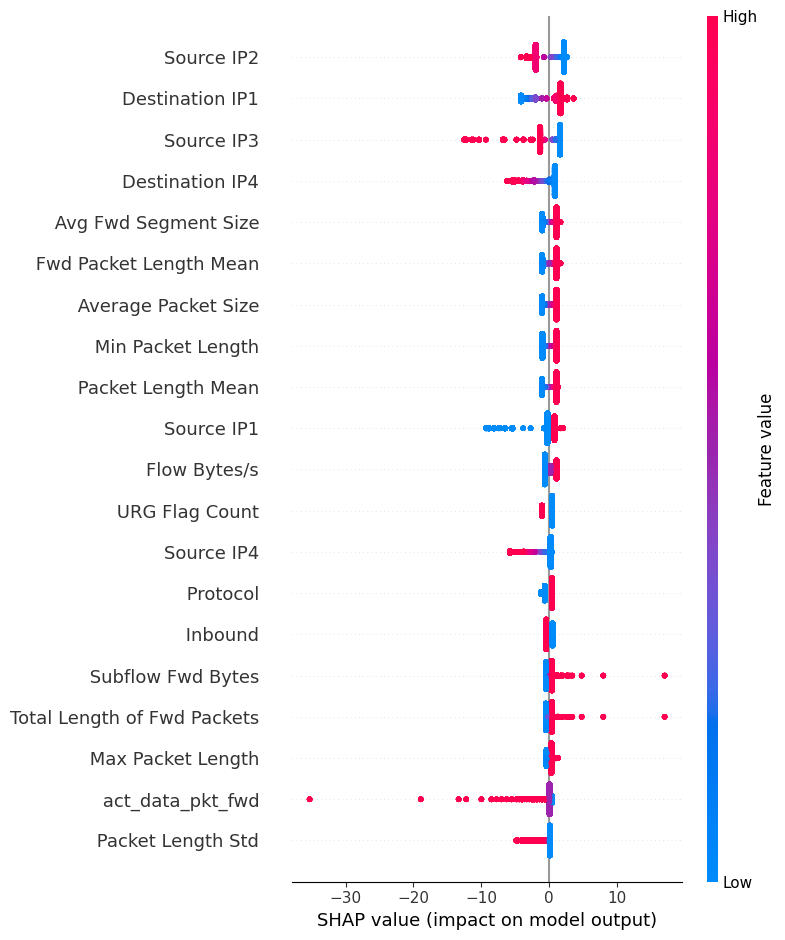

In [28]:
shap.summary_plot(shap_values, X_test)
# shap.summary_plot(shap_values, X_test, feature_names=x)

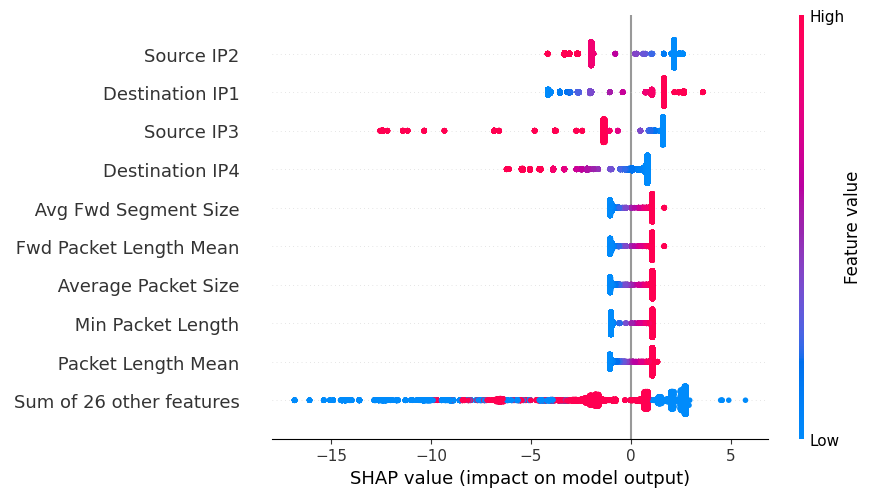

In [29]:
shap.plots.beeswarm(shap_values)

In [30]:
X = copy_df.drop(columns = ' Label', axis=1)
y = copy_df[' Label']

In [31]:
copy_df

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Label,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
1828060,642,11765,17,1,2,0,2944.0,0.0,1472.0,0.00000,...,1,172,16,0,5,192,168,50,1,-119.675929
1440274,691,41507,17,2,2,0,2944.0,0.0,1472.0,0.00000,...,1,172,16,0,5,192,168,50,1,-121.447822
1744063,54607,53,17,54280,2,2,76.0,188.0,38.0,0.00000,...,0,192,168,50,7,8,8,8,8,-120.060124
826984,997,49646,17,1,2,0,2928.0,0.0,1464.0,0.00000,...,1,172,16,0,5,192,168,50,1,-124.222314
1519380,941,42639,17,2,2,0,2944.0,0.0,1472.0,0.00000,...,1,172,16,0,5,192,168,50,1,-121.070014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487983,59375,80,6,32376,2,2,2.0,0.0,1.0,0.00000,...,0,192,168,50,8,172,217,10,110,-125.684757
611800,611,43455,17,3,2,0,2944.0,0.0,1472.0,0.00000,...,1,172,16,0,5,192,168,50,1,-125.140946
784731,989,13651,17,2,2,0,2944.0,0.0,1472.0,0.00000,...,1,172,16,0,5,192,168,50,1,-124.403729
684112,443,59386,6,177,1,2,0.0,0.0,0.0,0.00000,...,0,52,73,38,228,192,168,50,8,-124.832171


In [32]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
# X = standardized_data

In [33]:
dfX = pd.DataFrame(standardized_data, columns=X.columns)

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [35]:
X = dfX

In [36]:
X

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Mean,Fwd Packet Length Std,...,Inbound,Source IP1,Source IP2,Source IP3,Source IP4,Destination IP1,Destination IP2,Destination IP3,Destination IP4,newtime
0,-0.795838,-0.370794,0.739636,-0.187854,-0.007025,-0.234853,0.693242,-0.095884,1.004579,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,1.166976
1,-0.794070,0.929752,0.739636,-0.187853,-0.007025,-0.234853,0.693242,-0.095884,1.004579,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,0.514488
2,1.151648,-0.882932,0.739636,-0.111297,-0.007025,0.057640,-0.820778,-0.067179,-0.986284,-0.182731,...,-1.152444,0.573536,0.969363,0.591594,-0.262183,-1.908477,-1.716974,-0.855037,-0.329462,1.025499
3,-0.783027,1.285651,0.739636,-0.187854,-0.007025,-0.234853,0.684795,-0.095884,0.993472,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,-0.507200
4,-0.785048,0.979251,0.739636,-0.187853,-0.007025,-0.234853,0.693242,-0.095884,1.004579,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,0.653613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.323715,-0.881751,-1.172147,-0.142191,-0.007025,0.057640,-0.859843,-0.095884,-1.037652,-0.182731,...,-1.152444,0.573536,0.969363,0.591594,-0.244123,0.325592,1.070468,-0.813273,1.443006,-1.045735
99996,-0.796957,1.014933,0.739636,-0.187851,-0.007025,-0.234853,0.693242,-0.095884,1.004579,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,-0.845480
99997,-0.783316,-0.288324,0.739636,-0.187853,-0.007025,-0.234853,0.693242,-0.095884,1.004579,-0.182731,...,0.867721,-0.131709,-0.956636,-0.713410,-0.298304,0.598040,0.416953,0.022010,-0.451102,-0.574005
99998,-0.803020,1.711557,-1.172147,-0.187606,-0.009632,0.057640,-0.860898,-0.095884,-1.039041,-0.182731,...,0.867721,-4.363176,-0.234386,0.278393,3.729123,0.598040,0.416953,0.022010,-0.329462,-0.731776


In [37]:
correlations = []
for feature in X.columns:
    corr = X[feature].corr(y)
    correlations.append((feature, abs(corr)))
correlations.sort(key=lambda x: x[1], reverse=True)
k = 35 
selected_features = [feature for feature, _ in correlations[:k]]
X_selected = X[selected_features]
print("Selected Features:", selected_features)

Selected Features: [' Destination Port', ' Init_Win_bytes_backward', ' Source Port', ' Max Packet Length', ' Inbound', 'Source IP1', 'Total Length of Fwd Packets', ' Subflow Fwd Bytes', ' ACK Flag Count', ' Flow Packets/s', 'Fwd Packets/s', 'Init_Win_bytes_forward', ' Packet Length Mean', ' Average Packet Size', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', 'Source IP2', ' Min Packet Length', ' CWE Flag Count', ' Down/Up Ratio', 'Destination IP4', 'Flow Bytes/s', ' min_seg_size_forward', ' Fwd Header Length', ' Fwd Header Length.1', ' Bwd IAT Std', ' Bwd IAT Mean', 'Destination IP1', 'Fwd IAT Total', ' Bwd Packets/s', ' Fwd IAT Mean', 'newtime', ' Fwd IAT Std', 'Bwd IAT Total', ' Packet Length Variance']


In [38]:
from sklearn.feature_selection import SelectKBest, f_classif 

In [39]:
k = 35  
selector = SelectKBest(score_func=f_classif, k=k) 
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:", selected_feature_names)

Selected Features: Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Mean', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       'Fwd PSH Flags', 'Fwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' RST Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', ' Subflow Fwd Bytes',
       ' Subflow Bwd Packets', 'Init_Win_bytes_forward', ' Inbound',
       'Source IP2', 'Source IP3', 'Source IP4', 'Destination IP1',
       'Destination IP2', 'Destination IP4'],
      dtype='object')


In [40]:
alpha = 1.0 
lasso = LogisticRegression(penalty='l1', C=1/alpha, solver='liblinear')  
lasso.fit(X, y)
lasso_coefs = lasso.coef_[0]
selected_feature_indices = [i for i, coef in enumerate(lasso_coefs) if coef != 0]
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

Selected Features: Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Flow Bytes/s',
       ' Flow IAT Mean', 'Bwd IAT Total', ' Bwd IAT Std', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' SYN Flag Count', ' ACK Flag Count', ' URG Flag Count',
       ' CWE Flag Count', ' Down/Up Ratio', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets',
       'Init_Win_bytes_forward', ' act_data_pkt_fwd', ' Inbound', 'Source IP1',
       'Source IP2', 'Source IP3', 'Source IP4', 'Destination IP1',
       'Destination IP2', 'Destination IP3', 'Destination IP4', 'newtime'],
      dtype='object')


In [41]:
print("Selected Features:", len(selected_feature_names))

Selected Features: 37


In [42]:
from sklearn.feature_selection import  mutual_info_classif 

In [43]:
k = 20
selector = SelectKBest(score_func=mutual_info_classif, k=k) 
X_selected = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]
print("Selected Features:", selected_feature_names)

Selected Features: Index([' Source Port', ' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Mean', 'Flow Bytes/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Average Packet Size',
       ' Avg Fwd Segment Size', ' Subflow Fwd Bytes', ' Inbound', 'Source IP1',
       'Source IP2', 'Source IP3', 'Source IP4', 'Destination IP2',
       'Destination IP3', 'Destination IP4', 'newtime'],
      dtype='object')


In [44]:
xords = []
yxxtest = []
yxxtrain = []

In [45]:
from sklearn.metrics import classification_report